In [1]:
from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np

In [7]:
# csv_df = pd.read_csv('https://vae-bed.s3.us-east-2.amazonaws.com/updated_renamed.csv')
greg_df = pd.read_csv('/Users/swarchol/Research/seal/data/updated_renamed.csv')

In [8]:
greg_contours = pickle.load(open('/Users/swarchol/Research/seal/data/greg.contour.pkl', 'rb'))

In [9]:
points = greg_df[['UMAP_X', 'UMAP_Y']]

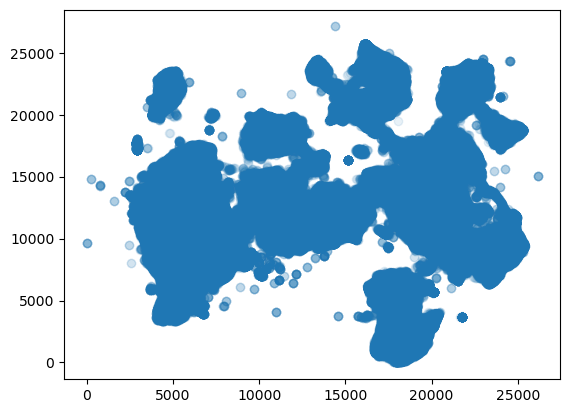

In [11]:
# plot the points
plt.scatter(points['UMAP_X'], points['UMAP_Y'], alpha=0.1)
plt.show()


In [18]:
from shapely.geometry import Point, Polygon, MultiPoint
import numpy as np
from tqdm import tqdm

# Convert the points DataFrame into a NumPy array for efficient processing
point_coords = points[['UMAP_X', 'UMAP_Y']].values
multipoints = MultiPoint(point_coords)

# Preallocate the list
points_in_contours = np.zeros(len(greg_contours), dtype=int)

for i, contour in enumerate(tqdm(greg_contours)):
    if len(contour) < 4:
        continue  # Skip small contours

    polygon = Polygon(contour)
    
    # Efficiently check which points are inside the polygon
    points_in_contours[i] = sum(polygon.contains(Point(x, y)) for x, y in point_coords)

# Convert back to list if needed
points_in_contours = points_in_contours.tolist()

100%|██████████| 69/69 [10:47<00:00,  9.38s/it]


In [20]:
np.save('greg.points_in_contours.npy', points_in_contours)